In [1]:
import math
import datetime
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
from yahoo_fin.stock_info import get_data
df= get_data("META", start_date="01/01/2000", end_date="31/12/2022", index_as_date = True, interval="1d")
df.head()

,open,high,low,close,adjclose,volume,ticker
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,META
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,META
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,META
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,META
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,META


In [3]:
df = df[['open', 'high', 'low', 'close', 'volume']]

In [4]:
# High minus low percent: 
df['hl_pct'] = (df['high'] - df['close']) / df['close'] * 100
df['pct_change'] = (df['close'] - df['open']) / df['open'] * 100

In [5]:
df.head()

,open,high,low,close,volume,hl_pct,pct_change
2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400,17.708607,-9.084423
2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700,7.728478,-6.843690
2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600,8.354839,-4.937138
2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000,1.562500,2.008285
2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200,0.544960,0.242786


In [6]:
df = df[['close', 'hl_pct', 'pct_change', 'volume']]
df.head()

,close,hl_pct,pct_change,volume
2012-05-18,38.230000,17.708607,-9.084423,573576400
2012-05-21,34.029999,7.728478,-6.843690,168192700
2012-05-22,31.000000,8.354839,-4.937138,101786600
2012-05-23,32.000000,1.562500,2.008285,73600000
2012-05-24,33.029999,0.544960,0.242786,50237200


In [7]:
forcast_col = 'close'
df.fillna(-99999, inplace=True)

forcast_out = int(math.ceil(0.03*len(df)))
forcast_out

81

In [8]:
df['label'] = df[forcast_col].shift(-forcast_out) 
df.tail()

,close,hl_pct,pct_change,volume,label
2022-12-23,118.040001,0.118603,1.732312,17796600,NaN
2022-12-27,116.879997,1.471596,-0.890361,21392300,NaN
2022-12-28,115.620003,2.188202,-0.541933,19612500,NaN
2022-12-29,120.260002,0.640277,3.316152,22366200,NaN
2022-12-30,120.339996,0.066480,1.844950,19583800,NaN


In [9]:
df.shape

(2673, 5)

In [10]:
X = np.array(df.drop(['label'], axis=1))
X = preprocessing.scale(X)
X = X[:-forcast_out]
X_lately = X[-forcast_out:]


df.dropna(inplace=True)
y = np.array(df['label'])

In [11]:
df.dropna(inplace=True)
print(len(X), len(y))

2592 2592


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(len(X_train), len(X_test), len(y_train), len(y_test))

2073 519 2073 519


In [13]:
model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [14]:
accuracy = model.score(X_test, y_test)
accuracy

0.8248878406156885

In [15]:
forcast_set = model.predict(X_lately)
forcast_set

array([187.66804162, 185.60228399, 194.30649197, 195.62226879,
       199.61097433, 192.35766782, 189.55562308, 191.17465664,
       194.15385603, 177.56165968, 181.65860881, 187.12717072,
       192.55088337, 191.94162441, 187.22239312, 191.68119984,
       191.32571831, 191.62507167, 193.35692493, 193.56947826,
       184.6618085 , 177.49526838, 166.41708088, 166.08368876,
       168.80035589, 163.55480598, 163.8335976 , 158.21944602,
       156.28604519, 158.35115078, 162.46316697, 170.8888473 ,
       164.40632498, 165.06998094, 162.04642416, 162.00445303,
       164.8697937 , 170.52255414, 172.33269966, 172.34618453,
       166.4320029 , 166.74847531, 165.02190879, 161.52891258,
       165.16505979, 168.06290167, 174.08077437, 180.72756   ,
       181.74849404, 168.90103085, 168.59078452, 162.9068393 ,
       165.42858049, 157.40682152, 158.96539668, 158.23102363,
       161.28197499, 166.77379063, 170.87415761, 167.82567029,
       168.85024901, 171.04035211, 176.8349499 , 177.96

In [16]:
print(accuracy, forcast_out)

0.8248878406156885 81


In [17]:
style.use('ggplot')

In [18]:
df['Forecast'] = np.nan
df['Forecast'].tail()

2022-08-30   NaN
2022-08-31   NaN
2022-09-01   NaN
2022-09-02   NaN
2022-09-06   NaN
Name: Forecast, dtype: float64

In [19]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day 

In [21]:
for i in forcast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

df['Forecast'].tail()

2023-02-11 05:30:00    161.286205
2023-02-12 05:30:00    164.015981
2023-02-13 05:30:00    165.593569
2023-02-14 05:30:00    164.606657
2023-02-15 05:30:00    162.133216
Name: Forecast, dtype: float64

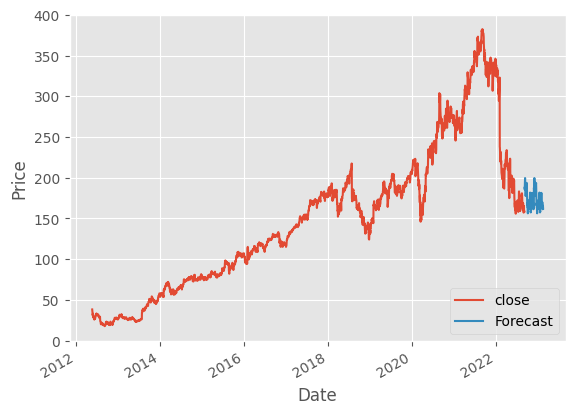

In [22]:
df['close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [21]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))